In [1]:
"""
Tests de fonctionnalités de la version 3.0.0 du module telenvi
données : deux images acquises entre avril et juin 2022, au dessus du massif montagneux du Tian Shan (Asie centrale).
L'une est issue du capteur Landsat 8, l'autre par Sentinel 2.
"""
from telenvi import raster_tools as rt
from PIL import Image
import os
b2_ls8_path = r"data\LC08_L1_20220411\LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF"
b2_s2a_path = r"data\S2A_L1C_20220603\T44TMM_20220603T052651_B02.jp2"
cuts = r"data\cuts\cuts.shp"

---------
telenvi package 3.0.0
---------


In [2]:
"""
1 - Fonctionnalités associées à la fonction d'ouverture de fichiers rasters
"""
pass

In [3]:
"""
# 1.1 - Crop manuel
"""
pass

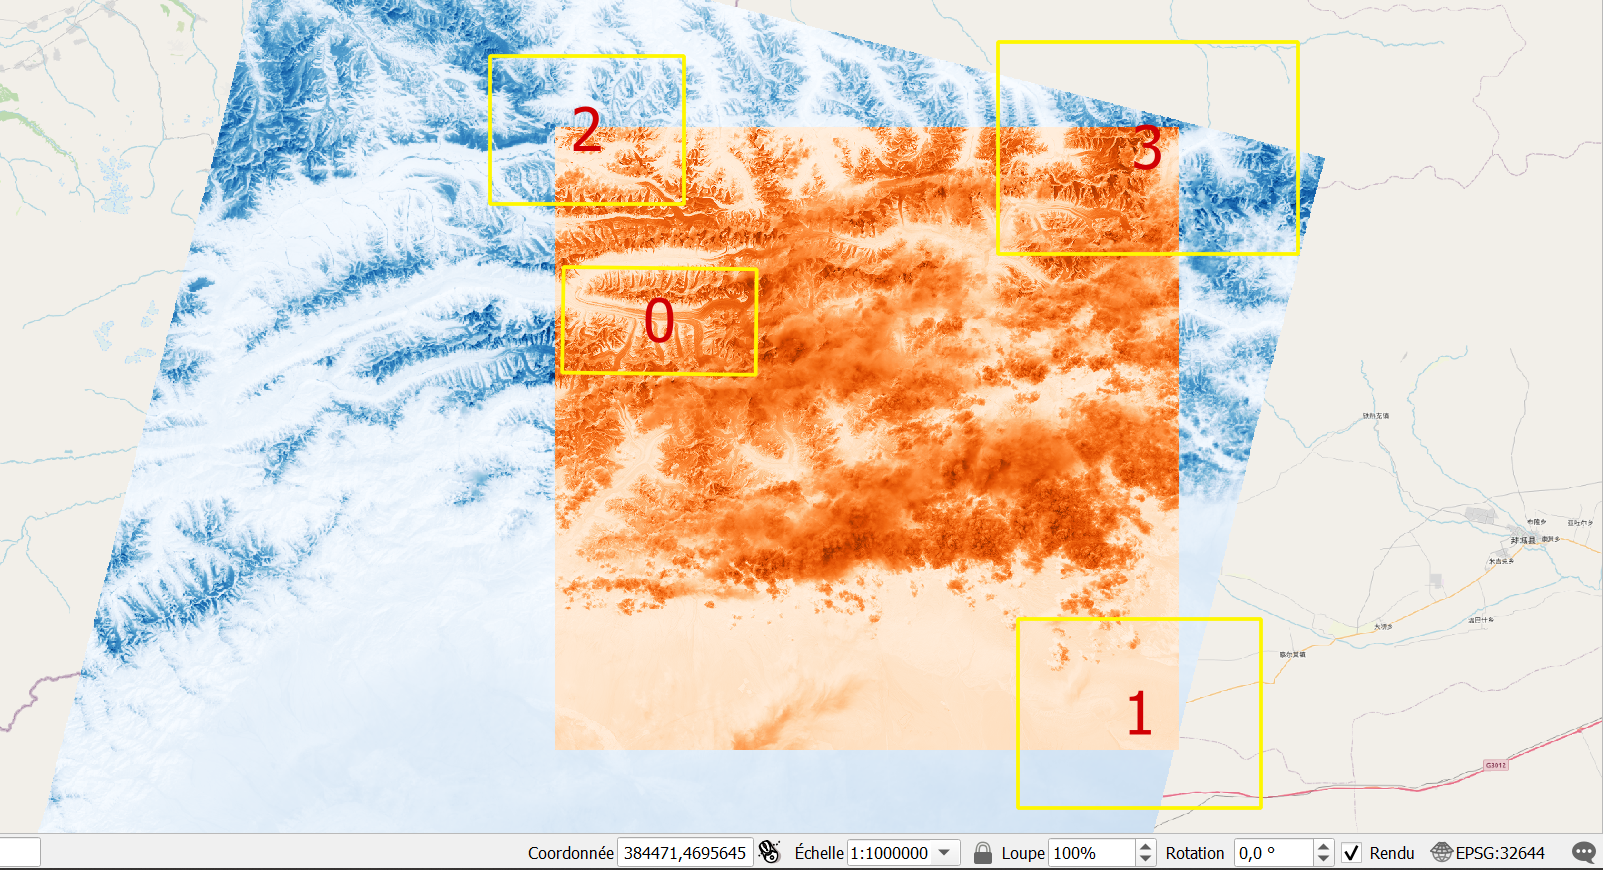

In [4]:
# 1.1.1 - Depuis des polygones contenus dans des shapefiles
# Ci-dessous, un aperçu de l'emprise du raster étudié ainsi que de celles des différents polygones sur lequel on va le croper successivement
# En nuances de oranges, une image Sentinel 2
# En bleu, LS8
apercu = r"figures\localisation_polygones.png"
im = Image.open(apercu)
im

LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF
numero polygone = 0


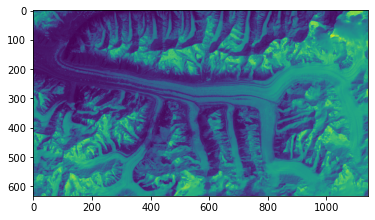

numero polygone = 1


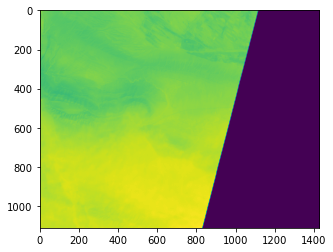

T44TMM_20220603T052651_B02.jp2
numero polygone = 0


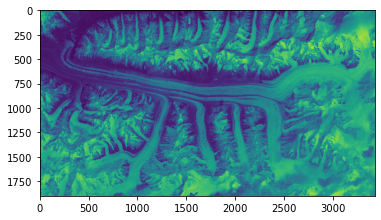

numero polygone = 1


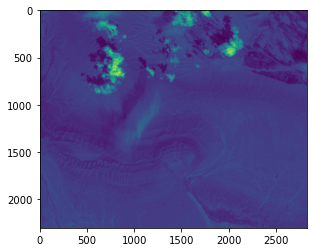

In [5]:
# Crops pour chaque image et chaque polygone
for raster_file in [b2_ls8_path, b2_s2a_path]:
    print(os.path.basename(raster_file))
    for polygon in range(0,2):
        print(f"numero polygone = {polygon}")
        crop = rt.openGeoRaster(
            rasterPath = raster_file,
            crop = cuts,
            pol = polygon,
            verbose = False)
        crop.quickVisual()

LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF loaded


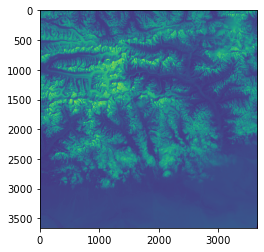

In [6]:
# 1.1.2 - Depuis un autre raster
crop_ls8_from_s2a = rt.openGeoRaster(
    rasterPath = b2_ls8_path,
    crop = b2_s2a_path)
crop_ls8_from_s2a

T44TMM_20220603T052651_B02.jp2 loaded
(1, 1000, 1000)
(10.0, -10.0)


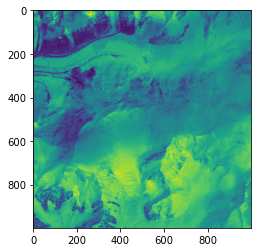

In [7]:
# 1.1.3 - Depuis un index de lignes / colonnes
col1, col2 = 3000, 4000
row1, row2 = 2000, 3000
crop_s2a_from_index = rt.openGeoRaster(
    rasterPath = b2_s2a_path,
    crop = (col1, row1, col2, row2))

# Print metadata
print(crop_s2a_from_index.shape())
print(crop_s2a_from_index.getPixelSize())

crop_s2a_from_index

T44TMM_20220603T052651_B02.jp2 loaded
(1, 100, 100)
(100.0, -100.0)


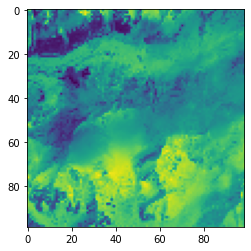

In [8]:

"""
# 1.2 - Resample manuel
"""
# Résolution initiale de 10m sur S2A : on la passe à 100 et on crop l'image en même temps
col1, col2 = 3000, 4000
row1, row2 = 2000, 3000
s2a_resamp_100 = rt.openGeoRaster(
    rasterPath = b2_s2a_path,
    crop = (col1, row1, col2, row2),
    res = 100)

# Print metadata
print(s2a_resamp_100.shape())
print(s2a_resamp_100.getPixelSize())
s2a_resamp_100

In [9]:
"""
# 1.3 - Reprojection manuelle
"""

# Système de projection initial : 32644 - On passe en 4326
s2a_WGS84 = rt.openGeoRaster(
    rasterPath = b2_s2a_path,
    crop = (col1, row1, col2, row2),
    epsg = 4326)
s2a_WGS84.save("figures/reproj4326.tif")
s2a_WGS84.ds.GetProjection()

T44TMM_20220603T052651_B02.jp2 loaded


'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [10]:
"""
# Clip automatique : changement de résolution, de système de projection
# et recalage des pixels sur ceux d'une autre image
"""

# Open the LS8 image with order to clip on the S2A image
ls8_clipped_on_s2a = rt.openGeoRaster(
    rasterPath = b2_ls8_path,
    clip = b2_s2a_path)

# Open the S2A image, to be allowed to compare themselves
s2a = rt.openGeoRaster(b2_s2a_path)

LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF loaded
T44TMM_20220603T052651_B02.jp2 loaded


In [11]:
# comparaison de la résolution
print("RESOLUTIONS X ET Y")
print(ls8_clipped_on_s2a.getPixelSize())
print(s2a.getPixelSize())

# comparaison du nb lignes / cols
print("\nNB DE LIGNES / COLONNES")
print(ls8_clipped_on_s2a.shape())
print(s2a.shape())

# comparaison de l'origine
print("\nPOINT D'ORIGINE DU RASTER - (ANCRAGE NORD-OUEST)")
print(ls8_clipped_on_s2a.getOriginPoint())
print(s2a.getOriginPoint())

# comparaison du système de projection
print("\nSYSTEME DE COORDONNEES")
print(ls8_clipped_on_s2a.ds.GetProjection() == s2a.ds.GetProjection())

# Sauvegarde pour aller observer dans qgis
ls8_clipped_on_s2a.save("figures/ls8_clipped_on_s2a.tif")

RESOLUTIONS X ET Y
(10.0, -10.0)
(10.0, -10.0)

NB DE LIGNES / COLONNES
(1, 10980, 10980)
(1, 10980, 10980)

POINT D'ORIGINE DU RASTER - (ANCRAGE NORD-OUEST)
(399960.0, 4700040.0)
(399960.0, 4700040.0)

SYSTEME DE COORDONNEES
True


In [12]:
"""
2 - Fonctionnalités associées à la gestion de stacks et à l'ouverture 
de plusieurs rasters contenus dans un même dossier en même temps
"""

"""
Je souhaite créer un stack RGB avec mon image S2A, et pareil pour mon image LS8,
uniquement sur l'emprise du polygone 0 de mon shapefile "cuts".

├───data
│   ├───S2A_L1C_20220603
│   │       T44TMM_20220603T052651_B08.jp2
│   │       T44TMM_20220603T052651_B02.jp2
│   │       T44TMM_20220603T052651_B03.jp2
│   │       T44TMM_20220603T052651_B04.jp2
│   │
│   ├───LC08_L1_20220411
│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF
│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF.aux.xml
│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B3.TIF
│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B4.TIF
│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B5.TIF
"""

'\nJe souhaite créer un stack RGB avec mon image S2A, et pareil pour mon image LS8,\nuniquement sur l\'emprise du polygone 0 de mon shapefile "cuts".\n\n├───data\n│   ├───S2A_L1C_20220603\n│   │       T44TMM_20220603T052651_B08.jp2\n│   │       T44TMM_20220603T052651_B02.jp2\n│   │       T44TMM_20220603T052651_B03.jp2\n│   │       T44TMM_20220603T052651_B04.jp2\n│   │\n│   ├───LC08_L1_20220411\n│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF\n│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B2.TIF.aux.xml\n│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B3.TIF\n│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B4.TIF\n│   │       LC08_L1TP_147031_20220411_20220419_02_T1_B5.TIF\n'

In [13]:
from telenvi import raster_tools as rt
from PIL import Image
import os
dir_S2A = r"data\S2A_L1C_20220603"
dir_LC08 = r"data\LC08_L1_20220411"
cuts = r"data\cuts\cuts.shp"

S2A = rt.openManyGeoRaster(
    directory = "data\S2A_L1C_20220603",
    pattern = "B[0-9]+.jp2",
    endKeyPos = -4,
    crop = cuts,
    pol = 0)

T44TMM_20220603T052651_B02.jp2 loaded
T44TMM_20220603T052651_B03.jp2 loaded
T44TMM_20220603T052651_B04.jp2 loaded
T44TMM_20220603T052651_B08.jp2 loaded


In [14]:
# Stackde tous les éléments du dictionnaire S2A
stack_s2a = rt.stackGeoIms([S2A[key] for key in S2A])

In [ ]:
# # Affiche en RGB mais en changeant l'ordre des bandes
# # et en augmentant un peu la luminosité
# stack_s2a.rgbVisual(
#     colorMode = [3,0,1],
#     brightness = 2
# )

In [ ]:
# Vérification du nombre de bandes : 
print(stack_s2a.shape())

# Affichage en RGB
stack_s2a.rgbVisual()

In [ ]:
stack_s2a.save("data/stack_S2A_L1C_20220603.tif")